In [4]:
import numpy as np
import seaborn as sns

In [6]:
import warnings
import os
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline 
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("time_series_US_1980_2021.csv")

In [8]:
df.head()

,Year,Drought Count,Drought Cost,Drought Lower 75,Drought Upper 75,Drought Lower 90,Drought Upper 90,Drought Lower 95,Drought Upper 95,Flooding Count,...,Winter Storm Lower 95,Winter Storm Upper 95,All Disasters Count,All Disasters Cost,All Disasters Lower 75,All Disasters Upper 75,All Disasters Lower 90,All Disasters Upper 90,All Disasters Lower 95,All Disasters Upper 95
0,1980,1,33.9,26.9,40.4,25.0,42.5,23.9,43.7,1,...,0.0,0.0,3,38.3,29.7,45.7,27.4,49.5,25.9,51.9
1,1981,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,2,2.9,2.4,3.0,1.9,3.4,1.4,4.1
2,1982,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.1,2.7,3,4.4,3.7,4.8,3.1,5.1,1.9,6.1
3,1983,1,8.0,5.6,9.2,5.1,10.2,4.7,10.8,2,...,0.0,0.0,5,30.0,23.0,33.9,21.4,36.1,20.2,37.3
4,1984,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,2,2.8,2.5,3.0,2.2,3.3,2.0,3.6


In [10]:
df.describe()

,Year,Drought Count,Drought Cost,Drought Lower 75,Drought Upper 75,Drought Lower 90,Drought Upper 90,Drought Lower 95,Drought Upper 95,Flooding Count,...,Winter Storm Lower 95,Winter Storm Upper 95,All Disasters Count,All Disasters Cost,All Disasters Lower 75,All Disasters Upper 75,All Disasters Lower 90,All Disasters Upper 90,All Disasters Lower 95,All Disasters Upper 95
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.00000,42.000000,42.000000,42.000000,42.000000
mean,2000.500000,0.666667,6.226190,5.445238,7.085714,5.195238,7.400000,5.040476,7.592857,0.785714,...,1.266667,1.940476,6.928571,45.845238,38.945238,50.97619,36.883333,53.780952,35.364286,55.661905
std,12.267844,0.477119,9.801047,8.210172,11.455099,7.802062,11.923619,7.597659,12.185625,0.976198,...,2.502357,3.893275,4.850913,61.478460,51.097917,69.29928,47.473412,74.735094,45.266640,77.423769
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1990.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.250000,16.125000,13.300000,17.47500,12.400000,18.200000,12.050000,18.775000
50%,2000.500000,1.000000,3.900000,3.250000,4.200000,3.050000,4.400000,2.900000,4.600000,0.500000,...,0.000000,0.000000,6.000000,24.400000,22.150000,26.80000,21.200000,27.750000,20.300000,28.600000
75%,2010.750000,1.000000,7.100000,5.850000,7.600000,5.550000,7.950000,5.350000,8.250000,1.000000,...,1.700000,2.550000,9.750000,50.150000,40.300000,55.02500,38.125000,57.550000,36.475000,60.125000
max,2021.000000,1.000000,45.400000,34.600000,55.300000,32.800000,57.700000,32.300000,59.000000,4.000000,...,11.700000,20.600000,22.000000,327.800000,266.700000,377.30000,242.600000,412.700000,228.100000,427.800000


In [12]:
df.dtypes

Year                        int64
Drought Count               int64
Drought Cost              float64
Drought Lower 75          float64
Drought Upper 75          float64
                           ...   
All Disasters Upper 75    float64
All Disasters Lower 90    float64
All Disasters Upper 90    float64
All Disasters Lower 95    float64
All Disasters Upper 95    float64
Length: 65, dtype: object

In [20]:
df.columns

Index(['Year', 'Drought Count', 'Drought Cost', 'Drought Lower 75',
       'Drought Upper 75', 'Drought Lower 90', 'Drought Upper 90',
       'Drought Lower 95', 'Drought Upper 95', 'Flooding Count',
       'Flooding Cost', 'Flooding Lower 75', 'Flooding Upper 75',
       'Flooding Lower 90', 'Flooding Upper 90', 'Flooding Lower 95',
       'Flooding Upper 95', 'Freeze Count', 'Freeze Cost', 'Freeze Lower 75',
       'Freeze Upper 75', 'Freeze Lower 90', 'Freeze Upper 90',
       'Freeze Lower 95', 'Freeze Upper 95', 'Severe Storm Count',
       'Severe Storm Cost', 'Severe Storm Lower 75', 'Severe Storm Upper 75',
       'Severe Storm Lower 90', 'Severe Storm Upper 90',
       'Severe Storm Lower 95', 'Severe Storm Upper 95',
       'Tropical Cyclone Count', 'Tropical Cyclone Cost',
       'Tropical Cyclone Lower 75', 'Tropical Cyclone Upper 75',
       'Tropical Cyclone Lower 90', 'Tropical Cyclone Upper 90',
       'Tropical Cyclone Lower 95', 'Tropical Cyclone Upper 95',
       'Wi

In [12]:
X = df.drop(['All Disasters Cost'],axis=1)
y = df['All Disasters Cost']

In [15]:
X.columns

Index(['Year', 'Drought Count', 'Drought Cost', 'Drought Lower 75',
       'Drought Upper 75', 'Drought Lower 90', 'Drought Upper 90',
       'Drought Lower 95', 'Drought Upper 95', 'Flooding Count',
       'Flooding Cost', 'Flooding Lower 75', 'Flooding Upper 75',
       'Flooding Lower 90', 'Flooding Upper 90', 'Flooding Lower 95',
       'Flooding Upper 95', 'Freeze Count', 'Freeze Cost', 'Freeze Lower 75',
       'Freeze Upper 75', 'Freeze Lower 90', 'Freeze Upper 90',
       'Freeze Lower 95', 'Freeze Upper 95', 'Severe Storm Count',
       'Severe Storm Cost', 'Severe Storm Lower 75', 'Severe Storm Upper 75',
       'Severe Storm Lower 90', 'Severe Storm Upper 90',
       'Severe Storm Lower 95', 'Severe Storm Upper 95',
       'Tropical Cyclone Count', 'Tropical Cyclone Cost',
       'Tropical Cyclone Lower 75', 'Tropical Cyclone Upper 75',
       'Tropical Cyclone Lower 90', 'Tropical Cyclone Upper 90',
       'Tropical Cyclone Lower 95', 'Tropical Cyclone Upper 95',
       'Wi

## Linear Regression

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:
r_sq = model.score(X_train,y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 1.0


In [30]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -7.450858432472394
slope: [ 3.74980294e-03  5.60467303e-02  9.10323847e-01 -1.01010639e-01
  1.36598583e-01 -7.86087783e-03  2.52320086e-02  4.01285221e-02
 -3.38005360e-01 -2.88107189e-01  8.17604561e-01  5.21109585e-02
  1.31764606e-02 -2.07016535e-01  6.26846104e-02 -9.82055849e-02
 -1.89499693e-02  8.58774811e-02  2.01549720e-01  1.66452864e-01
 -8.23292496e-02  1.70969375e-01  3.59275064e-02 -1.81465198e-02
  1.67942321e-01  4.65538032e-02  7.93178524e-01 -1.33086738e-01
 -3.33309933e-01  1.73242045e-01  1.27258949e-01  1.56163653e-02
  3.60969403e-03  5.38345305e-02  7.50281912e-01 -2.00324047e-01
  1.67034786e-01  8.13257811e-02 -2.08330711e-01  3.18655607e-02
  2.20879328e-02  2.17273859e-02  1.71345026e-01  4.53105219e-03
 -3.49206155e-02  8.02758873e-02  3.25644630e-02 -1.40848316e-02
  2.85400128e-01  2.39296524e-02  3.68068197e-01  4.08915816e-02
  2.94712574e-01  6.76013442e-02  4.82490497e-02 -8.70819096e-02
 -1.24515110e-01 -1.37605973e-04 -1.70434968e-01  1.6

In [31]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
R_square = model.score(X_test,y_test)
print('The Mean Square Error(MSE): ',mse)
print('R square:',R_square)

The Mean Square Error(MSE):  0.4602252033860975
R square: 0.998992734226704


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [38]:
pipeline = Pipeline([('std_scalar', StandardScaler())])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [40]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Year,0.003750
Drought Count,0.056047
Drought Cost,0.910324
Drought Lower 75,-0.101011
Drought Upper 75,0.136599
...,...
All Disasters Upper 75,0.160963
All Disasters Lower 90,0.358537
All Disasters Upper 90,0.123586
All Disasters Lower 95,-0.129908


In [41]:
pred = model.predict(X_test)

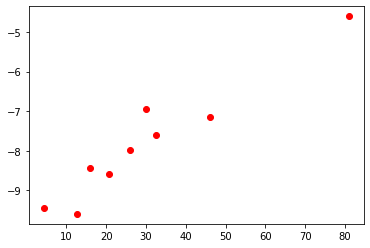

In [45]:
plt.scatter(y_test, pred,  color='red')
plt.show()

In [48]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def cross_val(model):
    pred = cross_val_score(model,X,y,cv=10)
    return pred.mean()

In [51]:
def print_evaluate(true, predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [54]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [55]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print_evaluate(y_test, test_pred)
print_evaluate(y_train, train_pred)

MAE: 37.72858837610248
MSE: 1823.6034040712948
RMSE: 42.703669679212524
R2 Square -2.9912053478871776
__________________________________
MAE: 57.64176752338149
MSE: 7609.04242797563
RMSE: 87.22982533500586
R2 Square -0.697261880466526
__________________________________


In [56]:
res = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
res

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,37.728588,1823.603404,42.70367,-2.991205,0.999551


## Supoort Vector Machine

In [58]:
from sklearn.svm import SVR
sv_regressor = SVR(kernel='rbf').fit(X, y)

In [59]:
pred = sv_regressor.predict(X_test)

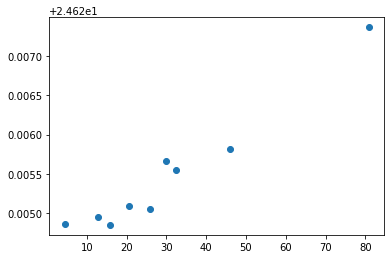

In [61]:
plt.scatter(y_test, pred)
plt.show()

In [62]:
test_pred = sv_regressor.predict(X_test)
train_pred = sv_regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 15.24114570056468
MSE: 484.81219571175797
RMSE: 22.018451255975247
R2 Square -0.06107776719748004
__________________________________
Train set evaluation:
_____________________________________
MAE: 36.71159925582261
MSE: 5136.3743362634505
RMSE: 71.66850309768895
R2 Square -0.14571215067673826
__________________________________


In [63]:
res_1 = pd.DataFrame(data=[["Support vector regressor", *evaluate(y_test, test_pred) , cross_val(SVR())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
res = res.append(res_1, ignore_index=True)
res

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,37.728588,1823.603404,42.703670,-2.991205,0.999551
1,Support vector regressor,15.241146,484.812196,22.018451,-0.061078,-0.653166


## Stochastic Gradient Descent

In [65]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=300,eta0 = 0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, max_iter=100000, n_iter_no_change=300)

In [67]:
test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3.3065485732217694
MSE: 15.147379242397157
RMSE: 3.8919634174022186
R2 Square 0.966847889785817
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.78168956743243
MSE: 8.501520843471695
RMSE: 2.9157367582605422
R2 Square 0.9981036631888706
__________________________________


In [68]:
res_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred) , 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
res = res.append(res_2, ignore_index=True)
res

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,37.728588,1823.603404,42.703670,-2.991205,0.999551
1,Support vector regressor,15.241146,484.812196,22.018451,-0.061078,-0.653166
2,Stochastic Gradient Descent,3.306549,15.147379,3.891963,0.966848,0.000000


## Decision Tree Regressor

In [70]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=0).fit(X, y)

In [71]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [73]:
test_pred = dt_regressor.predict(X_test)
train_pred = dt_regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 5.966666666666667
MSE: 109.27444444444447
RMSE: 10.453441751138449
R2 Square 0.7608379398281623
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0
__________________________________


In [74]:
res_3 = pd.DataFrame(data=[["Decision Tree Regressor", *evaluate(y_test, test_pred) , 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
res = res.append(res_3, ignore_index=True)
res

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,37.728588,1823.603404,42.703670,-2.991205,0.999551
1,Support vector regressor,15.241146,484.812196,22.018451,-0.061078,-0.653166
2,Stochastic Gradient Descent,3.306549,15.147379,3.891963,0.966848,0.000000
3,Decision Tree Regressor,5.966667,109.274444,10.453442,0.760838,0.000000


## Random Forest Regressor

In [76]:
from  sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=50, random_state=0).fit(X, y)

In [78]:
rf_regressor.fit(X_train, y_train)

test_pred = rf_regressor.predict(X_test)
train_pred = rf_regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2.624888888888889
MSE: 15.51850133333336
RMSE: 3.9393529079448264
R2 Square 0.9660356383550747
__________________________________
Train set evaluation:
_____________________________________
MAE: 4.730121212121218
MSE: 124.1994078787884
RMSE: 11.14447880696035
R2 Square 0.9722962616433637
__________________________________


In [79]:
res_4 = pd.DataFrame(data=[["Random forest Regressor", *evaluate(y_test, test_pred) , 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
res = res.append(res_4, ignore_index=True)
res

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,37.728588,1823.603404,42.703670,-2.991205,0.999551
1,Support vector regressor,15.241146,484.812196,22.018451,-0.061078,-0.653166
2,Stochastic Gradient Descent,3.306549,15.147379,3.891963,0.966848,0.000000
3,Decision Tree Regressor,5.966667,109.274444,10.453442,0.760838,0.000000
4,Random forest Regressor,2.624889,15.518501,3.939353,0.966036,0.000000


## Robust Regressor

In [81]:
from sklearn.linear_model import TheilSenRegressor
tr_regressor = TheilSenRegressor().fit(X, y)

In [83]:
test_pred = tr_regressor.predict(X_test)
train_pred = tr_regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 30.08856046941753
MSE: 1289.2790241720604
RMSE: 35.90653177587694
R2 Square -1.8217633969678162
__________________________________
Train set evaluation:
_____________________________________
MAE: 50.16299268311427
MSE: 6777.576645900331
RMSE: 82.32603868704197
R2 Square -0.5117963386211846
__________________________________


In [84]:
res_5 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(TheilSenRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
res = res.append(res_5, ignore_index=True)
res

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,37.728588,1823.603404,42.703670,-2.991205,0.999551
1,Support vector regressor,15.241146,484.812196,22.018451,-0.061078,-0.653166
2,Stochastic Gradient Descent,3.306549,15.147379,3.891963,0.966848,0.000000
3,Decision Tree Regressor,5.966667,109.274444,10.453442,0.760838,0.000000
4,Random forest Regressor,2.624889,15.518501,3.939353,0.966036,0.000000
5,Robust Regression,30.088560,1289.279024,35.906532,-1.821763,0.999750


## Ridge Regressor

In [85]:
from sklearn.linear_model import Ridge

ridge_regressor = Ridge(alpha=100, tol=0.0005, random_state=42)
ridge_regressor.fit(X_train, y_train)

Ridge(alpha=100, random_state=42, tol=0.0005)

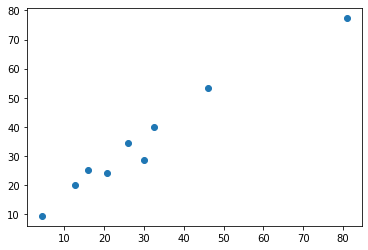

In [87]:
pred = ridge_regressor.predict(X_test)

plt.scatter(y_test, pred)
plt.show()

In [89]:
test_pred = ridge_regressor.predict(X_test)
train_pred = ridge_regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 5.9219625937002025
MSE: 41.27698984496365
RMSE: 6.424717102329382
R2 Square 0.9096596648996698
__________________________________
Train set evaluation:
_____________________________________
MAE: 8.269309668931827
MSE: 161.44731621077585
RMSE: 12.706192042101987
R2 Square 0.9639877976628556
__________________________________


In [90]:
res_6 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
res= res.append(res_6, ignore_index=True)
res

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,37.728588,1823.603404,42.703670,-2.991205,0.999551
1,Support vector regressor,15.241146,484.812196,22.018451,-0.061078,-0.653166
2,Stochastic Gradient Descent,3.306549,15.147379,3.891963,0.966848,0.000000
3,Decision Tree Regressor,5.966667,109.274444,10.453442,0.760838,0.000000
4,Random forest Regressor,2.624889,15.518501,3.939353,0.966036,0.000000
5,Robust Regression,30.088560,1289.279024,35.906532,-1.821763,0.999750
6,Ridge Regression,5.921963,41.276990,6.424717,0.909660,0.997317


## Elastic Net Regressor

In [92]:
from sklearn.linear_model import ElasticNet

elastinet_regressor = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
elastinet_regressor.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.9, random_state=42, selection='random')

In [94]:
test_pred = elastinet_regressor.predict(X_test)
train_pred = elastinet_regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.9909691436453651
MSE: 1.702865253263553
RMSE: 1.3049387929184852
R2 Square 0.9962730466008216
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.548233456698099
MSE: 0.46824689779891476
RMSE: 0.6842856843445687
R2 Square 0.9998955535314984
__________________________________


In [95]:
res_7 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
res = res.append(res_7, ignore_index=True)
res

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,37.728588,1823.603404,42.703670,-2.991205,0.999551
1,Support vector regressor,15.241146,484.812196,22.018451,-0.061078,-0.653166
2,Stochastic Gradient Descent,3.306549,15.147379,3.891963,0.966848,0.000000
3,Decision Tree Regressor,5.966667,109.274444,10.453442,0.760838,0.000000
4,Random forest Regressor,2.624889,15.518501,3.939353,0.966036,0.000000
5,Robust Regression,30.088560,1289.279024,35.906532,-1.821763,0.999750
6,Ridge Regression,5.921963,41.276990,6.424717,0.909660,0.997317
7,Elastic Net Regression,0.990969,1.702865,1.304939,0.996273,0.987425


## LightGBM Regressor

In [97]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(n_estimators=300, max_depth=2, bagging_fraction=0.9, random_state=42)

In [99]:
lgb_model.fit(X_train, y_train)

test_pred = lgb_model.predict(X_test)
train_pred = lgb_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
Test set evaluation:
_____________________________________
MAE: 27.10403997585027
MSE: 868.1756158709028
RMSE: 29.46481997010847
R2 Square -0.9001210204111478
__________________________________
Train set evaluation:
_____________________________________
MAE: 43.30247912196745
MSE: 4483.128099173555
RMSE: 66.9561655053032
R2 Square 0.0
__________________________________


In [100]:
res_8 = pd.DataFrame(data=[["LightGBM Regression", *evaluate(y_test, test_pred) , 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
res = res.append(res_8, ignore_index=True)
res

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,37.728588,1823.603404,42.703670,-2.991205,0.999551
1,Support vector regressor,15.241146,484.812196,22.018451,-0.061078,-0.653166
2,Stochastic Gradient Descent,3.306549,15.147379,3.891963,0.966848,0.000000
3,Decision Tree Regressor,5.966667,109.274444,10.453442,0.760838,0.000000
4,Random forest Regressor,2.624889,15.518501,3.939353,0.966036,0.000000
5,Robust Regression,30.088560,1289.279024,35.906532,-1.821763,0.999750
6,Ridge Regression,5.921963,41.276990,6.424717,0.909660,0.997317
7,Elastic Net Regression,0.990969,1.702865,1.304939,0.996273,0.987425
8,LightGBM Regression,27.104040,868.175616,29.464820,-0.900121,0.000000


In [102]:
import pickle
filename = 'time_series_US_1980_2021_modeling.pkl'

In [103]:
with open(filename,'wb') as f:
    pickle.dump(model, f)
    pickle.dump(sv_regressor, f)
    pickle.dump(sgd_reg, f)
    pickle.dump(dt_regressor, f)
    pickle.dump(rf_regressor, f)
    pickle.dump(tr_regressor, f)
    pickle.dump(ridge_regressor, f)
    pickle.dump(elastinet_regressor, f)
    pickle.dump(lgb_model, f)